# **ML22: Forecasting and Time Series Analysis with Python**
> ## *Keywords: Holt-Winters, Exponential smoothing, SARIMA, Auto ARIMA, Pmdarima, ACF, PACF, Differencing, Seasonal decomposition*
## Complete article: https://medium.com/analytics-vidhya/ml22-6318a9c9dc35
## @author: Morton Kuo (2021/02/10)
## Same code on Colab: https://bit.ly/371pUN5


---
## **Outline**
*   (1) Installing "pmdarima" & Data Input
*   (2) Seasonal Decomposition using Moving Averages
*   (3) Stationarity: First and Second Order Differencing
*   (4) AR and MA: ACF & PACF
*   (5) SARIMA using Auto ARIMA function from pmdarima
*   (6) Forecasting with SARIMA & Holt-Winters
>6-1 *Data Splitting* \
>6-2 *Time series analysis* \
>6-3 *SARIMA* \
>6-4 *Holt-Winters (Exponential Smoothing)* \
>6-5 *Model Evaluation of SARIMA & Holt-Winters*

---
## **Reference**

1. Brownlee, J. (2020). How to Decompose Time Series Data into Trend and Seasonality. Retrieved from https://bit.ly/2N9yRgi
2. Ryan Boch (2020). Prediction intervals exponential smoothing statsmodels. Retrieved from  https://bit.ly/3rEMqmT
3. tutorialspoint (2019). Time Series. Retrieved from https://bit.ly/39WaDiw
4. QuantStats (2019). displaying statsmodels plot_acf and plot_pacf side by side in a jupyter notebook. Retrieved from https://bit.ly/3cTEfz5
5. Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice (2nd ed.). OTexts: Melbourne, Australia. Retrieved from https://otexts.com/fpp2/
6. Sarkar, D., Bali, R., & Sharma, T. (2018). Practical Machine Learning with Python: A problem-solver's guide to building real-world intelligent systems. Karnataka, India: Apress. 
7. ayhan (2018). Holt-Winters time series forecasting with statsmodels. Retrieved from https://bit.ly/3cTKP8K
8. cel (2015). Changing fig size with statsmodel. Retrieved from https://bit.ly/3pWB2SW
9. McKinney, W., Perktold, J., & Seabold, S. (2011). Time Series Analysis in Python with statsmodels. Retrieved from https://bit.ly/3utCUW1
10. pypi.org (Unidentified). pmdarima. Retrieved from https://bit.ly/3aQrdjk
11. Smith, T.G. et al. (Unidentified). pmdarima: ARIMA estimators for Python. Retrieved from https://bit.ly/2N5RgKO
12. Smith, T.G. et al. (Unidentified). pmdarima.datasets.load_wineind. Retrieved from https://bit.ly/2N5XZVc
13. Smith, T.G. et al. (Unidentified). Tips to using auto_arima. Retrieved from https://bit.ly/3cZXreE
14. statsmodels (Unidentified). statsmodels v0.12.1. Retrieved from https://bit.ly/2NaDzKD



---
## Introduction

We assume the reader is already familiar with time series theories including SARIMA & Holt-Winters; if not, check reference [3][5][7][9][13] for more details. Hence, we put emphasis primarily on how to conduct forecasting & time series analysis with Python. Let’s get started!

In traditional time series area (cf. cutting edge forecasting approaches like RNN, LSTM, GRU), Python is still like a teenager and R is like an adult already. Fortunately, there are some emerging Python modules like pmdarima, starting from 2017, developed by Taylor G Smith et al., help convert R’s time series code into Python code.

### A New Module: pmdarima

pmdarima brings R’s beloved auto.arima to Python, making an even stronger case for why you don’t need R for data science. pmdarima is 100% Python + Cython and does not leverage any R code, but is implemented in a powerful, yet easy-to-use set of functions & classes that will be familiar to scikit-learn users. [11]

### A Toy Dataset: Australian Total Wine Sales
Australian total wine sales by wine makers in bottles <= 1 liter. This time-series records monthly wine sales by Australian wine makers between Jan 1980 — Aug 1994. This dataset is found in the R forecast package. [12]

---
# **(1) Installing "pmdarima" & Data Input**

In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.5 MB 862 kB/s 
     |████████████████████████████████| 2.1 MB 4.5 MB/s 
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 0.1.0b20210210 requires numpy==1.19, but you have numpy 1.19.5 which is incompatible.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pmdarima as pm
from sklearn.model_selection import train_test_split

y = pm.datasets.load_wineind()

datetime_1 = pd.period_range('1980-01', periods=176, freq='M')

dataset_wine = pd.DataFrame(data={'sales': y}, index=datetime_1)

# pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

# import datetime
# dataset_wine.index = df_0.DATE

In [3]:
datetime_1

PeriodIndex(['1980-01', '1980-02', '1980-03', '1980-04', '1980-05', '1980-06',
             '1980-07', '1980-08', '1980-09', '1980-10',
             ...
             '1993-11', '1993-12', '1994-01', '1994-02', '1994-03', '1994-04',
             '1994-05', '1994-06', '1994-07', '1994-08'],
            dtype='period[M]', length=176, freq='M')

In [4]:
dataset_wine.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 176 entries, 1980-01 to 1994-08
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   176 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [5]:
dataset_wine.head(n=3)

,sales
1980-01,15136.0
1980-02,16733.0
1980-03,20016.0


In [6]:
# Data split by 80-20 split
train, test = train_test_split(dataset_wine, train_size=0.8, random_state=2021)
print(train.shape); print(test.shape)

(140, 1)
(36, 1)


In [7]:
print(type(train))
print(train[:10])
print(len(train))

<class 'pandas.core.frame.DataFrame'>
           sales
1989-05  21752.0
1986-08  34569.0
1980-11  26786.0
1980-07  22893.0
1984-05  26886.0
1982-07  26580.0
1989-11  31222.0
1983-01  16896.0
1985-07  24872.0
1986-06  26485.0
140


In [8]:
print(type(test))
print(test[:10])
print('--------')
print(len(test))

<class 'pandas.core.frame.DataFrame'>
           sales
1994-03  23565.0
1983-10  23145.0
1980-01  15136.0
1991-02  22146.0
1986-05  24603.0
1980-09  21133.0
1990-11  32568.0
1986-01  19969.0
1982-05  22417.0
1981-02  17977.0
--------
36


In [9]:
print(np.r_[train, test].shape)

(176, 1)


---
# **(2) Seasonal Decomposition using Moving Averages**

In [10]:
dataset_wine.iloc[:,0]

1980-01    15136.0
1980-02    16733.0
1980-03    20016.0
1980-04    17708.0
1980-05    18019.0
            ...   
1994-04    26323.0
1994-05    23779.0
1994-06    27549.0
1994-07    29660.0
1994-08    23356.0
Freq: M, Name: sales, Length: 176, dtype: float64

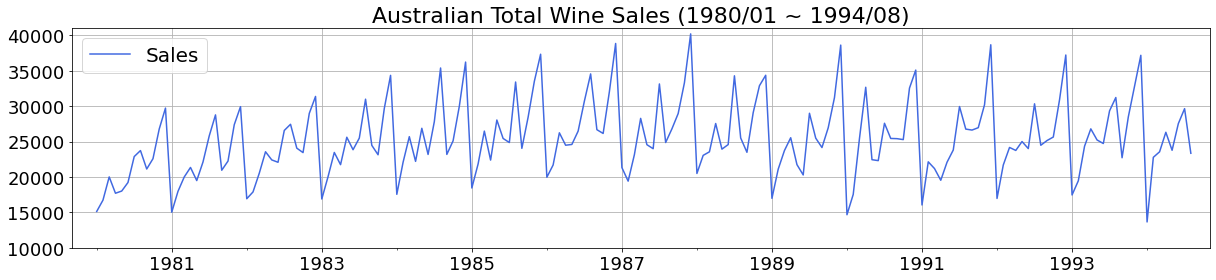

In [11]:
dataset_wine.plot(figsize=(17,4), grid=True, c='royalblue')

plt.axis([116, 298, 14000, 41000]) 
plt.xticks(fontsize = 18)  
plt.yticks(range(10000, 45000, 5000), fontsize = 18)

# plt.ylabel('Sales', fontsize = 20)
plt.title('Australian Total Wine Sales (1980/01 ~ 1994/08)', fontsize = 22)

plt.legend(['Sales'], loc='upper left', fontsize=20);

plt.tight_layout()
plt.show()

In [12]:
print(type(dataset_wine))
dataset_wine_array = dataset_wine.to_numpy()
print(type(dataset_wine_array))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


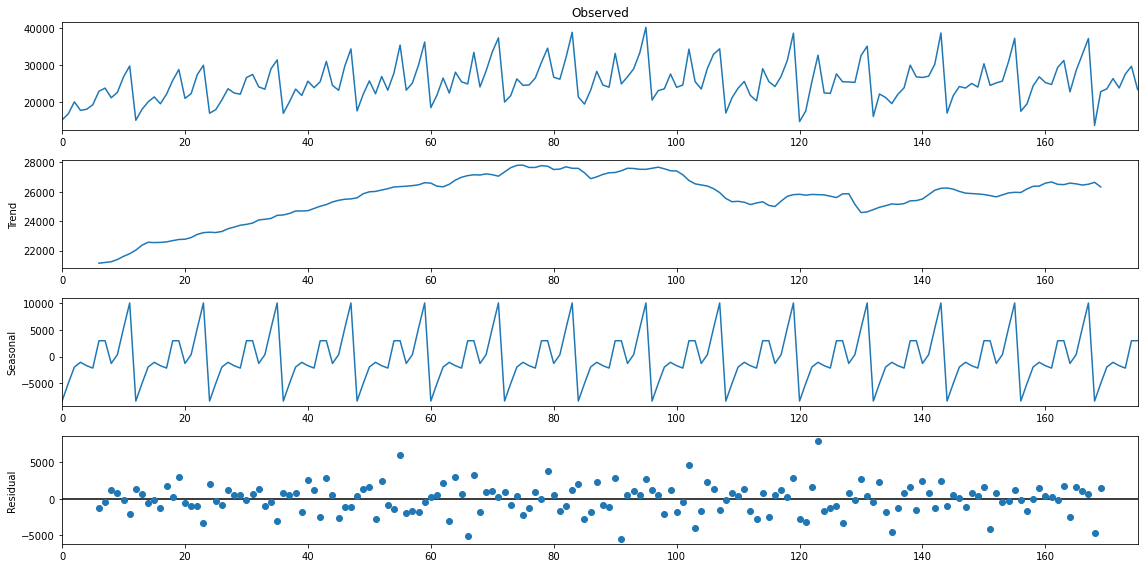

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 16, 8

# Redo the same thing, but with the known frequency
seasonal_decompose(x=dataset_wine_array,model='additive', period=12).plot()
plt.show();

---
# **(3) Stationarity: First and Second Order Differencing**

In [14]:
(dataset_wine_array.transpose())[0][:5]

array([15136., 16733., 20016., 17708., 18019.])

In [15]:
dataset_wine_series = pd.Series(dataset_wine_array.transpose()[0])
print(type(dataset_wine_array)); print(type(dataset_wine_series))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


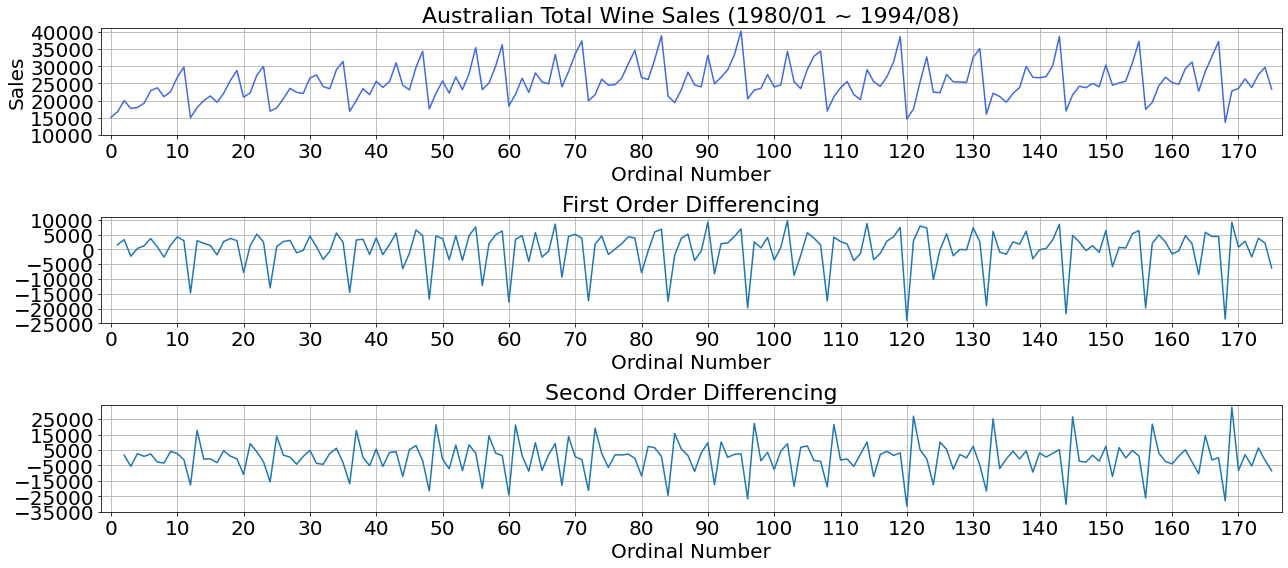

In [16]:
plt.subplots(figsize=(18,8))


# 1. Original data 
plt.subplot(3,1,1)
plt.grid()

x = np.arange(y.shape[0])
plt.plot(x, dataset_wine_array, c='royalblue')

plt.axis([-1.5, 176.5, 14500, 41000]) 
plt.xticks(range(0, 180, 10), fontsize = 20)  
plt.yticks(range(10000, 45000, 5000), fontsize = 20)

plt.ylabel('Sales', fontsize = 20)
plt.xlabel('Ordinal Number', fontsize = 20)
plt.title('Australian Total Wine Sales (1980/01 ~ 1994/08)', fontsize = 22)


# 2. Fisrt oreder differencing 
diff = dataset_wine_series.diff()

plt.subplot(3,1,2)
plt.grid()
plt.plot(diff)

plt.axis([-1.5, 176.5, -25000, 11000]) 
plt.xticks(range(0, 180, 10), fontsize = 20)  
plt.yticks(range(-25000, 11000, 5000), fontsize = 20)

plt.ylabel('', fontsize = 20)
plt.xlabel('Ordinal Number', fontsize = 20)
plt.title('First Order Differencing', fontsize = 22)


# 3. Second oreder differencing 
diff_2 = diff.diff()

plt.subplot(3,1,3)
plt.grid()
plt.plot(diff_2)

plt.axis([-1.5, 176.5, -33000, 34000]) 
plt.xticks(range(0, 180, 10), fontsize = 20)  
plt.yticks(range(-35000, 35000, 10000), fontsize = 20)

plt.ylabel('', fontsize = 20)
plt.xlabel('Ordinal Number', fontsize = 20)
plt.title('Second Order Differencing', fontsize = 22)


plt.tight_layout()
plt.show()

In [17]:
# Stationarity
from pmdarima.arima import ndiffs as ndiffs

# test =  (‘kpss’, ‘adf’, ‘pp’)

print('KPSS: d =', ndiffs(dataset_wine_array, alpha=0.05, test='kpss', max_d=2)) # d = 1. Indicating non-stationary sequence
print('ADF: d =', ndiffs(dataset_wine_array, alpha=0.05, test='adf', max_d=2)) # d = 0. Indicating stationary sequence
print('PP: d =', ndiffs(dataset_wine_array, alpha=0.05, test='pp', max_d=2)) # d = 0. Indicating stationary sequence

KPSS: d = 1
ADF: d = 0
PP: d = 0


In [18]:
# KPSS from statsmodels

# Null hypothesis is stationary series
from statsmodels.tsa.stattools import kpss as s_KPSS
result_s_KPSS = s_KPSS(dataset_wine_array)

print(f'KSPSS Statistics: {result_s_KPSS[0]: .2f}')
print(f'p-value: {result_s_KPSS[1]: .4f}')
print('Critical Values: ')
for key, value in result_s_KPSS[3].items():
    print(f'\t{key: <4s}: {value: .3f}')

# p = 0.032 < 0.05, indiacting non-stationary sequence. 

KSPSS Statistics:  0.54
p-value:  0.0316
Critical Values: 
	10% :  0.347
	5%  :  0.463
	2.5%:  0.574
	1%  :  0.739


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [19]:
result_s_KPSS[3]

{'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}

In [20]:
# Augmented Dickey-Fuller Test (ADF) of statsmodels

# Null hypothesis is non-stationary series

from statsmodels.tsa.stattools import adfuller as s_ADF
result_s_ADF = s_ADF(train)

print(f'ADF Statistics: {result_s_ADF[0]: .2f}')
print(f'p-value: {result_s_ADF[1]: .4f}')
print('Critical Values: ')
for key, value in result_s_ADF[4].items():
    print(f'\t{key: <4s}: {value: .3f}')
    
# p > 0.05, indiacting non-stationary series. 

ADF Statistics: -12.25
p-value:  0.0000
Critical Values: 
	1%  : -3.478
	5%  : -2.883
	10% : -2.578


In [21]:
result_s_ADF[4]

{'1%': -3.4782936965183815,
 '5%': -2.882567574015525,
 '10%': -2.5779830117488745}

---
# **(4) AR and MA: ACF & PACF**

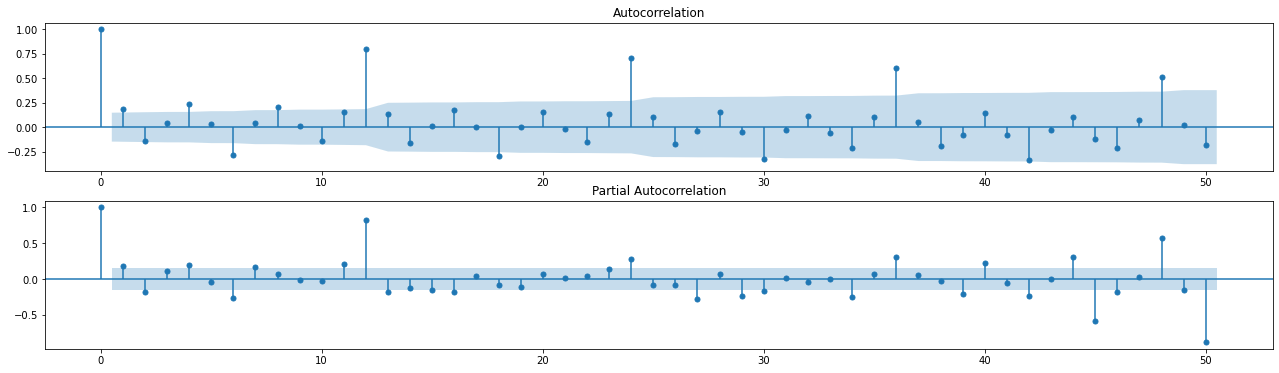

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(2,1,figsize=(22,6), sharex=False)
sm.graphics.tsa.plot_acf(dataset_wine_array, lags=50, ax=ax[0])
sm.graphics.tsa.plot_pacf(dataset_wine_array, lags=50, ax=ax[1])
plt.show()

---
# **(5) SARIMA using Auto ARIMA function from pmdarima**

In [23]:
# Fit the model
model = pm.auto_arima(dataset_wine_array, seasonal=True, m=12, 
                      information_criterion='aic', test='kpss',
                      suppress_warnings=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=3069.263, Time=1.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3131.408, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3097.884, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3066.329, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3089.456, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3067.457, Time=0.37 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3067.481, Time=0.56 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3071.631, Time=0.20 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.98 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3117.921, Time=0.34 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3066.492, Time=0.54 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3065.533, Time=0.26 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=3087.883, Time=0.10 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=3066.239, Time=0.49 sec
 ARIMA(0,1,2)(0,1,2)[12]

In [24]:
# The best model
model.set_params()

ARIMA(order=(0, 1, 2), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  176
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1528.766
Date:                              Wed, 24 Feb 2021   AIC                           3065.533
Time:                                      17:57:57   BIC                           3077.908
Sample:                                           0   HQIC                          3070.557
                                              - 176                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5756      0.041    -13.952      0.000      -0.656      -0.495
ma.L2         -0.1065      0.048     -2.224      0.026      -0.200      -0.013
ma.S.L12      -0.3848      0.054     -7.156      0.000      -0.490      -0.279
sigma2      7.866e+06   7.01e+05     11.228      0.000    6.49e+06    9.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.84   Jarque-Bera (JB):                18.05
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.55
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model_SARIMA = pm.ARIMA(order=(0,1,2), seasonal_order=(0,1,1,12), solver='lbfgs', maxiter=200, 
                        suppress_warnings=False, scoring='mse',enforce_invertibility=False).fit(dataset_wine_array)
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  176
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1527.854
Date:                              Wed, 24 Feb 2021   AIC                           3065.707
Time:                                      17:58:00   BIC                           3081.176
Sample:                                           0   HQIC                          3071.988
                                              - 176                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -56.8571     42.980     -1.323      0.186    -141.097      27.383
ma.L1         -1.1978      0.150     -8.006      0.000      -1.491      -0.905
ma.L2         -0.2056      0.063     -3.274      0.001      -0.329      -0.083
ma.S.L12      -0.3915      0.054     -7.281      0.000      -0.497      -0.286
sigma2      4.197e+06    7.5e+05      5.600      0.000    2.73e+06    5.67e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.12   Jarque-Bera (JB):                18.65
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -0.56
Prob(H) (two-sided):                  0.50   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---
# **(6) Forecasting with SARIMA & Holt-Winters**

> ## 6-1 Data splitting

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pmdarima as pm
from sklearn.model_selection import train_test_split

y = pm.datasets.load_wineind()

datetime_1 = pd.period_range('1980-01', periods=176, freq='M')
dataset_wine = pd.DataFrame(data={'sales': y}, index=datetime_1)

# Data splitting by 80-20 split
# train, test = train_test_split(dataset_wine, train_size=0.8, random_state=2021)
print(dataset_wine.shape)
print(round(dataset_wine.shape[0] * 0.8))

(176, 1)
141


In [28]:
train, test = dataset_wine.iloc[0:141,], dataset_wine.iloc[141:,]

> ## 6-2 Time series analysis

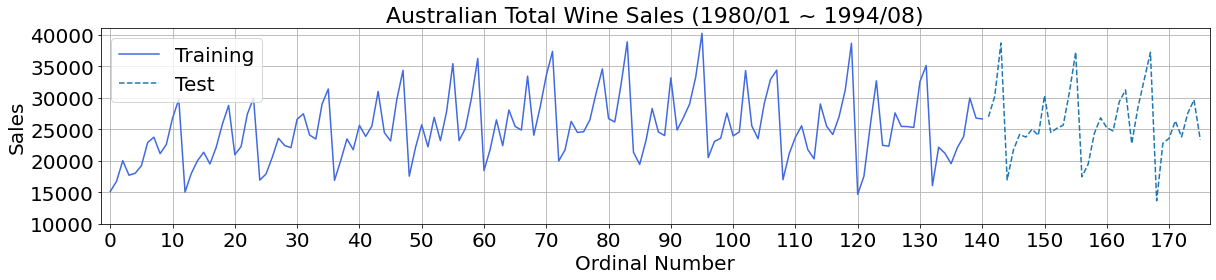

In [29]:
plt.figure(figsize=(17,4))

# train.plot(figsize=(19,5), grid=True, c='royalblue', label='Training')
# test.plot(ls='--',c='tab:blue', label='Test')

plt.grid()

x1 = np.arange(train.shape[0])
plt.plot(x1, train, c='royalblue', label='Training')
x2 = np.arange(train.shape[0], np.r_[train, test].shape[0])
plt.plot(x2, test, ls='--',c='tab:blue', label='Test')

plt.axis([-1.5, 176.5, 14500, 41000]) 
plt.xticks(range(0, 180, 10), fontsize = 20)  
plt.yticks(range(10000, 45000, 5000), fontsize = 20)

plt.ylabel('Sales', fontsize = 20)
plt.xlabel('Ordinal Number', fontsize = 20)
plt.title('Australian Total Wine Sales (1980/01 ~ 1994/08)', fontsize = 22)

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

In [30]:
# Stationarity
from pmdarima.arima import ndiffs as ndiffs

# test =  (‘kpss’, ‘adf’, ‘pp’)

print('KPSS: d =', ndiffs(train, alpha=0.05, test='kpss', max_d=2)) # d = 1. Indicating non-stationary sequence
print('ADF: d =', ndiffs(train, alpha=0.05, test='adf', max_d=2)) # d = 0. Indicating stationary sequence
print('PP: d =', ndiffs(train, alpha=0.05, test='pp', max_d=2)) # d = 0. Indicating stationary sequence

KPSS: d = 1
ADF: d = 0
PP: d = 0


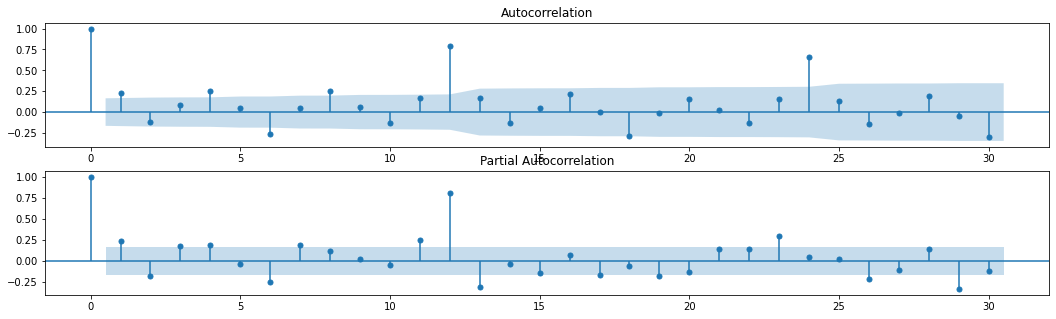

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(2,1,figsize=(18,5), sharex=False)
sm.graphics.tsa.plot_acf(train, lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train, lags=30, ax=ax[1])
plt.show();

> ## 6-3 SARIMA

In [32]:
## SARIMA
from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pmdarima as pm
'''
pipeline = Pipeline([
    ("boxcox", BoxCoxEndogTransformer()),
    ("model", pm.AutoARIMA(seasonal=True, m=12, information_criterion='aic', test='kpss', 
                           maxiter=150, suppress_warnings=True, trace=True, verbose=1))
])

model = pipeline.fit(train)
print(pipeline.predict(5))
print(model.predict(5))
'''
# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12, 
                      information_criterion='aic', test='kpss', maxiter=150,
                      suppress_warnings=True, trace=True, verbose=1)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2689.342, Time=3.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2861.295, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2725.124, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2737.541, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2859.321, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2734.058, Time=2.11 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=2.49 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=9.55 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=5.98 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2801.122, Time=0.15 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2724.117, Time=1.91 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=2689.241, Time=6.20 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=2685.705, Time=3.96 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : 

In [33]:
# Best model
model.set_params()

ARIMA(maxiter=150, order=(2, 1, 1), scoring_args={},
      seasonal_order=(2, 0, 0, 12), suppress_warnings=True,
      with_intercept=False)

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  141
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1336.204
Date:                             Wed, 24 Feb 2021   AIC                           2684.409
Time:                                     17:59:23   BIC                           2702.059
Sample:                                          0   HQIC                          2691.581
                                             - 141                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0030      0.084     -0.035      0.972      -0.168       0.162
ar.L2         -0.2160      0.104     -2.082      0.037      -0.419      -0.013
ma.L1         -0.8727      0.019    -46.059      0.000      -0.910      -0.836
ar.S.L12       0.5116      0.046     11.080      0.000       0.421       0.602
ar.S.L24       0.3077      0.067      4.589      0.000       0.176       0.439
sigma2      1.007e+07   2.45e-09   4.11e+15      0.000    1.01e+07    1.01e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):               455.68
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.37
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.3e+31. Standard errors may be unstable.
"""

In [35]:
model_SARIMA = pm.ARIMA(order=(2,1,1), seasonal_order=(2,0,0,12), solver='lbfgs', maxiter=150, 
                        enforce_invertibility=False, suppress_warnings=False, scoring='mse').fit(train)
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  141
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1335.852
Date:                             Wed, 24 Feb 2021   AIC                           2685.705
Time:                                     17:59:28   BIC                           2706.296
Sample:                                          0   HQIC                          2694.072
                                             - 141                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.7283     27.150      0.727      0.467     -33.485      72.942
ar.L1          0.0014      0.082      0.017      0.986      -0.159       0.162
ar.L2         -0.2145      0.105     -2.052      0.040      -0.419      -0.010
ma.L1         -0.8797      0.030    -29.220      0.000      -0.939      -0.821
ar.S.L12       0.5120      0.048     10.741      0.000       0.419       0.605
ar.S.L24       0.3035      0.069      4.383      0.000       0.168       0.439
sigma2      1.003e+07      0.000   4.42e+10      0.000       1e+07       1e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               407.26
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             1.31
Prob(H) (two-sided):                  0.02   Kurtosis:                        10.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.05e+26. Standard errors may be unstable.
"""

In [36]:
# Make forecasts
pred_SARIMA = model_SARIMA.predict(test.shape[0])  # predict N steps into the future

In [37]:
pred_SARIMA[0:5]

array([25360.25175424, 30337.61882876, 34351.51993768, 17348.00934173,
       21260.61653233])

In [38]:
# Confidence interval
pred_SARIMA_conf_int = model_SARIMA.predict(test.shape[0], return_conf_int=True)[1]

In [39]:
pred_SARIMA_conf_int[:5]

array([[19151.76231944, 31568.74118903],
       [24083.29054771, 36591.9471098 ],
       [28070.01844474, 40633.02143061],
       [11039.40170126, 23656.61698219],
       [14891.86942494, 27629.36363971]])

In [40]:
lower_limits = [k[0] for k in pred_SARIMA_conf_int]
upper_limits = [k[1] for k in pred_SARIMA_conf_int]

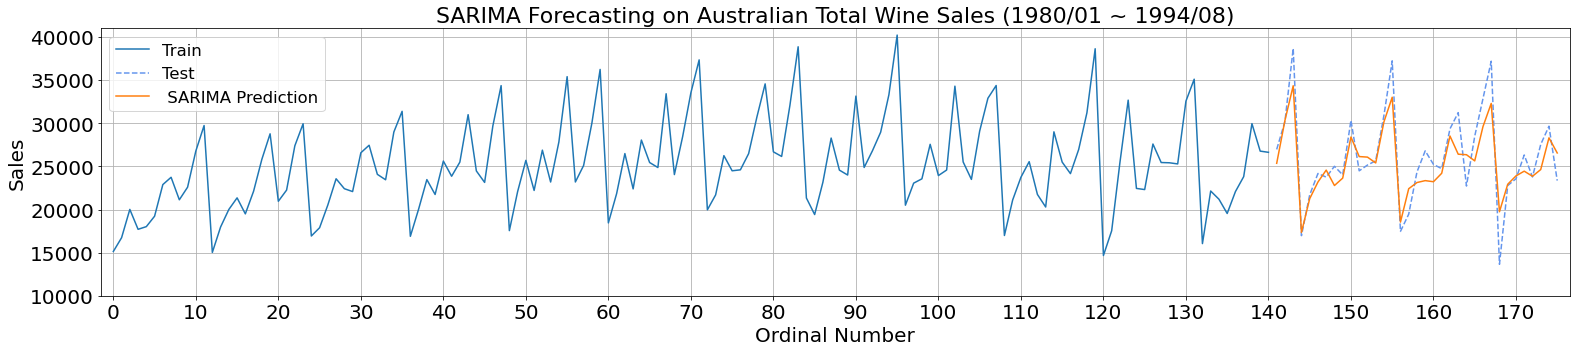

In [41]:
# SARIMA

# Visualize the forecasts (blue=train, green=forecasts)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(22,5))
plt.grid()

plt.plot(np.arange(0,train.shape[0]), train, label='Train', color='tab:blue')
plt.plot(np.arange(train.shape[0], dataset_wine_array.shape[0]), test, '--', label='Test', color='cornflowerblue')
plt.plot(np.arange(train.shape[0], dataset_wine_array.shape[0]), pred_SARIMA, label=' SARIMA Prediction', color='tab:orange')

plt.axis([-1.5, 176.5, 14500, 41000]) 
plt.xticks(range(0, 180, 10), fontsize = 20)  
plt.yticks(range(10000, 45000, 5000), fontsize = 20)

plt.ylabel('Sales', fontsize = 20)
plt.xlabel('Ordinal Number', fontsize = 20)
plt.title('SARIMA Forecasting on Australian Total Wine Sales (1980/01 ~ 1994/08)', fontsize = 22)

plt.legend(loc='upper left', fontsize=16.5)
plt.tight_layout()
plt.show();

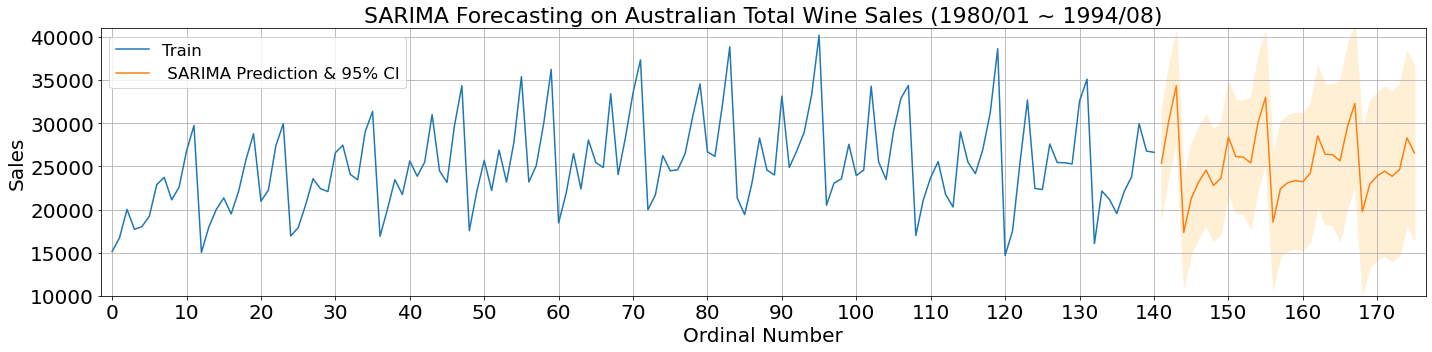

In [42]:
# SARIMA

# Visualize the forecasts (blue=train, green=forecasts)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.grid()

plt.plot(np.arange(0,train.shape[0]), train, label='Train', color='tab:blue')
# plt.plot(np.arange(train.shape[0], dataset_wine_array.shape[0]), test, '--', label='Test', color='cornflowerblue')
plt.plot(np.arange(train.shape[0], dataset_wine_array.shape[0]), pred_SARIMA, label=' SARIMA Prediction & 95% CI', color='tab:orange')

plt.fill_between(np.arange(train.shape[0], dataset_wine_array.shape[0]), lower_limits, upper_limits, color='papayawhip')

plt.axis([-1.5, 176.5, 14500, 41000]) 
plt.xticks(range(0, 180, 10), fontsize = 20)  
plt.yticks(range(10000, 45000, 5000), fontsize = 20)

plt.ylabel('Sales', fontsize = 20)
plt.xlabel('Ordinal Number', fontsize = 20)
plt.title('SARIMA Forecasting on Australian Total Wine Sales (1980/01 ~ 1994/08)', fontsize = 22)

plt.legend(loc='upper left', fontsize=16.5)
plt.tight_layout()
plt.show();

In [43]:
import numpy as np

def mape_(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse_SARIMA = mean_squared_error(test, pred_SARIMA)
from math import sqrt
rmse_SARIMA = sqrt(mse_SARIMA)
print(f'RMSE: {rmse_SARIMA:.2f}')

mae_SARIMA = mean_absolute_error(test, pred_SARIMA)
print(f'MAE: {mae_SARIMA:.2f}')

mape_SARIMA = mape_(test, pred_SARIMA)
print(f'MAPE: {mape_SARIMA:.2f}')

RMSE: 2524.13
MAE: 1958.35
MAPE: 20.37


> ## 6-4 Holt-Winters (Exponential Smoothing)

In [45]:
## Holt-Winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_HW = ExponentialSmoothing(train,  trend='add', seasonal='add', seasonal_periods=12, damped_trend=True).fit(optimized=True, use_boxcox=False, remove_bias=False)

pred_HW = model_HW.predict(start=train.shape[0], end=dataset_wine_array.shape[0]-1)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


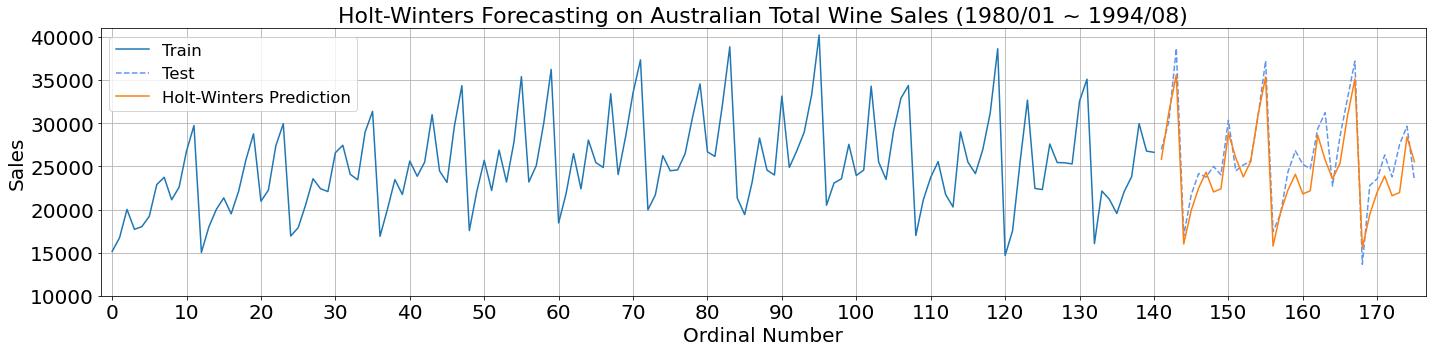

In [46]:
# Holt-Winters

plt.figure(figsize=(20,5))
plt.grid()

plt.plot(np.arange(0,train.shape[0]), train, label='Train', color='tab:blue')
plt.plot(np.arange(train.shape[0], dataset_wine_array.shape[0]), test, '--', label='Test', color='cornflowerblue')
plt.plot(np.arange(train.shape[0], dataset_wine_array.shape[0]), pred_HW, label='Holt-Winters Prediction', color='tab:orange')

plt.axis([-1.5, 176.5, 14500, 41000]) 
plt.xticks(range(0, 180, 10), fontsize = 20)  
plt.yticks(range(10000, 45000, 5000), fontsize = 20)

plt.ylabel('Sales', fontsize = 20)
plt.xlabel('Ordinal Number', fontsize = 20)
plt.title('Holt-Winters Forecasting on Australian Total Wine Sales (1980/01 ~ 1994/08)', fontsize = 22)

plt.legend(loc='upper left', fontsize=16.5)
plt.tight_layout()
plt.show();

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mse_HW = mean_squared_error(test, pred_HW)
from math import sqrt
rmse_HW = sqrt(mse_HW)
print(f'RMSE: {rmse_HW:.2f}')

mae_HW = mean_absolute_error(test, pred_HW)
print(f'MAE: {mae_HW:.2f}')

mape_HW = mape_(test, pred_HW)
print(f'MAPE: {mape_HW:.2f}')

RMSE: 2319.85
MAE: 1961.39
MAPE: 23.28


> ## 6-5 Model Evaluation of SARIMA & Holt-Winters

In [48]:
model_evaluation = pd.DataFrame()

In [49]:
pd.DataFrame([['SARIMA', rmse_SARIMA, mae_SARIMA, mape_SARIMA],
              ['Holt-Winters', rmse_HW, mae_HW, mape_HW]],
             columns=['Forescasting Model', 'RMSE', 'MAE', 'MAPE'],
             ).T

,0,1
Forescasting Model,SARIMA,Holt-Winters
RMSE,2524.129624,2319.847405
MAE,1958.348851,1961.391154
MAPE,20.372101,23.276722
